In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

import joblib

In [2]:
import pandas as pd

df = pd.read_csv("data/whatsapp_cleaned_data.csv")
df.head()

,date,time,user,message
0,1/12/26,9:19 AM,User1,ML ka class ajj hai?
1,2/10/26,12:59 PM,User2,*Follow this link to Join the WhatsApp Group* ...
2,2/10/26,11:43 PM,User2,*Follow this link to Join the WhatsApp Group* ...
3,2/13/26,10:37 PM,User3,*TRAINING + INTERNSHIP PROGRAM* ...
4,2/18/26,12:23 AM,User2,*TRAINING + INTERNSHIP PROGRAM* ...


In [3]:
df.columns

Index(['date', 'time', 'user', 'message'], dtype='object')

In [4]:
# combine date and time to datetime

df["datetime"] = pd.to_datetime(
    df["date"] + " " + df["time"],
    format="%m/%d/%y %I:%M %p"
)

In [5]:
# behavioural features

df["hour"] = df["datetime"].dt.hour
df["day_of_week"] = df["datetime"].dt.dayofweek
df["message_length"] = df["message"].astype(str).apply(len)
df["word_count"] = df["message"].astype(str).apply(lambda x: len(x.split()))

In [6]:
# remove system/empty messages

df = df[df["user"] != "group_notification"]
df = df[df["message"].notna()]

In [7]:
# encode target

le = LabelEncoder()
df["user_encoded"] = le.fit_transform(df["user"])

In [16]:
# text features (TF-IDF)

X = tfidf.fit_transform(df["message"])
y = le.fit_transform(df["user"])

In [9]:
# combine numerical and text features

num_features = df[["hour", "day_of_week", "message_length", "word_count"]].values

from scipy.sparse import hstack
X = hstack([text_features, num_features])
y = df["user_encoded"]

In [10]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
# train model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X, y)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


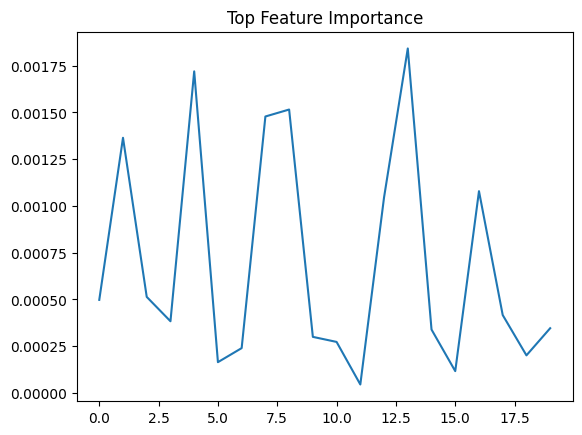

In [13]:
# top feature importance

import matplotlib.pyplot as plt

importances = model.feature_importances_[:20]
plt.plot(importances)
plt.title("Top Feature Importance")
plt.show()

In [18]:
import joblib

joblib.dump(model, "model.pkl")
joblib.dump(tfidf, "vectorizer.pkl")   
joblib.dump(le, "label_encoder.pkl")

print("All artifacts saved correctly ")

All artifacts saved correctly 


In [19]:
print("Model features:", model.n_features_in_)
print("Vectorizer features:", len(tfidf.get_feature_names_out()))

Model features: 500
Vectorizer features: 500
